In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/sapanamahajani/Desktop/Data/eda_data.csv')

In [3]:
df

,company_name,job_title,experience,avg_salary,min_salary,max_salary,num_of_salaries,job,seniority
0,TCS,Data Scientist,2,7.8,4.5,16.0,841,Data Scientist,Junior
1,Accenture,Data Scientist,2,12.8,5.8,23.0,501,Data Scientist,Junior
2,IBM,Data Scientist,2,13.4,5.3,25.0,394,Data Scientist,Junior
3,Cognizant,Data Scientist,2,9.8,5.0,18.0,318,Data Scientist,Junior
4,Capgemini,Data Scientist,2,8.6,4.8,14.6,300,Data Scientist,Junior
...,...,...,...,...,...,...,...,...,...
1597,Collabera Technologies,Data Architect,8,17.0,12.0,23.1,4,Data Architect,Junior
1598,Coforge,Data Architect,7,27.1,18.5,39.0,4,Data Architect,Junior
1599,Hitachi,Data Architect,21,40.0,25.0,50.0,3,Data Architect,Junior
1600,GE Power,Data Architect,7,16.7,14.9,19.0,3,Data Architect,Junior


In [4]:
df.columns

Index(['company_name', 'job_title', 'experience', 'avg_salary', 'min_salary',
       'max_salary', 'num_of_salaries', 'job', 'seniority'],
      dtype='object')

In [5]:
df_model=df[['company_name','experience','avg_salary','job','num_of_salaries']]

In [6]:
df_model

,company_name,experience,avg_salary,job,num_of_salaries
0,TCS,2,7.8,Data Scientist,841
1,Accenture,2,12.8,Data Scientist,501
2,IBM,2,13.4,Data Scientist,394
3,Cognizant,2,9.8,Data Scientist,318
4,Capgemini,2,8.6,Data Scientist,300
...,...,...,...,...,...
1597,Collabera Technologies,8,17.0,Data Architect,4
1598,Coforge,7,27.1,Data Architect,4
1599,Hitachi,21,40.0,Data Architect,3
1600,GE Power,7,16.7,Data Architect,3


In [7]:
duplicated_rows = []

# Iterate through each row in the original DataFrame
for index, row in df_model.iterrows():
    # Get the value of 'num_of_salary' for the current row
    num_of_salaries = row['num_of_salaries']
    
    # Duplicate the current row 'num_of_salaries' times
    for _ in range(num_of_salaries):
        duplicated_rows.append(row)

# Create a new DataFrame from the duplicated rows
duplicated_df = pd.DataFrame(duplicated_rows)


In [8]:
duplicated_df

,company_name,experience,avg_salary,job,num_of_salaries
0,TCS,2,7.8,Data Scientist,841
0,TCS,2,7.8,Data Scientist,841
0,TCS,2,7.8,Data Scientist,841
0,TCS,2,7.8,Data Scientist,841
0,TCS,2,7.8,Data Scientist,841
...,...,...,...,...,...
1600,GE Power,7,16.7,Data Architect,3
1600,GE Power,7,16.7,Data Architect,3
1601,T-Systems,16,33.3,Data Architect,3
1601,T-Systems,16,33.3,Data Architect,3


In [17]:
duplicated_df[duplicated_df['company_name']=='GE Power']

,company_name,experience,avg_salary,job,num_of_salaries
1476,GE Power,8,15.4,Data Engineer,4
1476,GE Power,8,15.4,Data Engineer,4
1476,GE Power,8,15.4,Data Engineer,4
1476,GE Power,8,15.4,Data Engineer,4
1600,GE Power,7,16.7,Data Architect,3
1600,GE Power,7,16.7,Data Architect,3
1600,GE Power,7,16.7,Data Architect,3


In [10]:
duplicated_df.reset_index(inplace=True,drop=True)

In [11]:
duplicated_df

,company_name,experience,avg_salary,job,num_of_salaries
0,TCS,2,7.8,Data Scientist,841
1,TCS,2,7.8,Data Scientist,841
2,TCS,2,7.8,Data Scientist,841
3,TCS,2,7.8,Data Scientist,841
4,TCS,2,7.8,Data Scientist,841
...,...,...,...,...,...
93000,GE Power,7,16.7,Data Architect,3
93001,GE Power,7,16.7,Data Architect,3
93002,T-Systems,16,33.3,Data Architect,3
93003,T-Systems,16,33.3,Data Architect,3


In [12]:
df_model=duplicated_df

In [13]:
df_dum = pd.get_dummies(df_model)

In [14]:
df1=df_dum[df_dum['company_name_TCS']==1]
df1[['experience','avg_salary','company_name_TCS']]

,experience,avg_salary,company_name_TCS
0,2,7.8,1
1,2,7.8,1
2,2,7.8,1
3,2,7.8,1
4,2,7.8,1
...,...,...,...
92576,8,19.9,1
92577,8,19.9,1
92578,8,19.9,1
92579,8,19.9,1


In [15]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_train

,experience,num_of_salaries,company_name_3i Infotech,company_name_AAIC Technologies,company_name_ABB Group,company_name_ABC,company_name_ACL Digital,company_name_ACS Solution,company_name_ADP Solutions,company_name_AI Touch,...,company_name_iOPEX Technologies,company_name_nThrive Global Solutions,company_name_o9 Solutions,company_name_phData,job_Business Analyst,job_Data Analyst,job_Data Architect,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer
22450,2,662,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40331,1,45,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
56996,2,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29524,2,225,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,2,300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54886,1,69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76820,2,152,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,2,501,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X_test

,experience,num_of_salaries,company_name_3i Infotech,company_name_AAIC Technologies,company_name_ABB Group,company_name_ABC,company_name_ACL Digital,company_name_ACS Solution,company_name_ADP Solutions,company_name_AI Touch,...,company_name_iOPEX Technologies,company_name_nThrive Global Solutions,company_name_o9 Solutions,company_name_phData,job_Business Analyst,job_Data Analyst,job_Data Architect,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer
65342,0,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48857,0,302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15938,1,1700,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
82270,3,31,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16421,1,1700,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41714,1,38,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9272,2,4200,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26774,2,382,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6819,1,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
y_train

array([ 8.3,  6.8, 10.3, ..., 15. , 12.8,  6.4])

In [19]:
y_test

array([ 6.4,  2.5,  6.4, ..., 12.1, 11.9, 11.1])

In [20]:
from sklearn.linear_model import LinearRegression, Lasso

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

CROSS_VAL_SCORE -> It basically takes a sample of the data set and a validation set and sees how well the model predicts as a whole

In [22]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [23]:
#np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
print(cross_val_score(lm, X_train, y_train, cv=3))

[ 8.47956137e-01  8.45394930e-01 -3.48693551e+10]


TRYING TO FIND THE BEST "ALPHA" FOR LASSO REGRESSION

In [26]:
alpha = []
error = []

for i in range(1,10):
    print(i)
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    

1
2
3
4
5
6
7
8
9


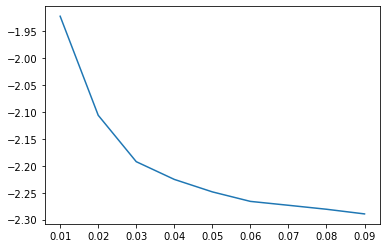

In [27]:
import matplotlib.pyplot as plt
plt.plot(alpha,error)

In [28]:
err = tuple(zip(alpha,error))

In [29]:
df_err = pd.DataFrame(err, columns = ['alpha','error'])

In [30]:
df_err

,alpha,error
0,0.01,-1.922481
1,0.02,-2.106288
2,0.03,-2.192423
3,0.04,-2.225319
4,0.05,-2.248459
5,0.06,-2.266119
6,0.07,-2.273343
7,0.08,-2.280709
8,0.09,-2.289367


In [31]:
df_err[df_err.error == max(df_err.error)]


,alpha,error
0,0.01,-1.922481


In [32]:
lm_l = Lasso(alpha=.01)
lm_l.fit(X_train,y_train)
print(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))


-1.9224806986075522


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

print(np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3)))

-0.01907506114341383


In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
from sklearn.linear_model import Ridge
rid=Ridge()

TRYING TO FIND ALPHA FOR RIDGE REGRESSION


In [36]:
alpha = []
error = []

for i in range(1,10):
    print(i)
    alpha.append(i/100)
    rid = Ridge(alpha=(i/100))
    error.append(np.mean(cross_val_score(rid,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    

1
2
3
4
5
6
7
8
9


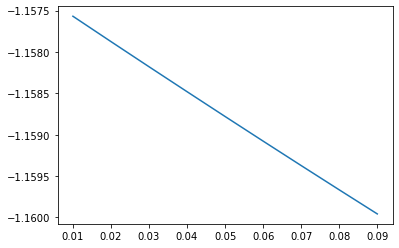

In [37]:
import matplotlib.pyplot as plt
plt.plot(alpha,error)

In [38]:
err = tuple(zip(alpha,error))

In [39]:
df_err = pd.DataFrame(err, columns = ['alpha','error'])

In [40]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-1.157568


In [41]:
models = {
    "lm": LinearRegression(),
    "lm_l": Lasso(alpha=0.01),
    "rf": RandomForestRegressor(),
    "rid": Ridge(alpha=0.01)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    

lm
Model performance for Training set
- Root Mean Squared Error: 2.0056
- Mean Absolute Error: 1.1485
- R2 Score: 0.8520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8864
- Mean Absolute Error: 1.1229
- R2 Score: 0.8670
lm_l
Model performance for Training set
- Root Mean Squared Error: 2.9388
- Mean Absolute Error: 1.9206
- R2 Score: 0.6822
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.8991
- Mean Absolute Error: 1.9027
- R2 Score: 0.6859
rf
Model performance for Training set
- Root Mean Squared Error: 0.0376
- Mean Absolute Error: 0.0019
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1169
- Mean Absolute Error: 0.0060
- R2 Score: 0.9995
rid
Model performance for Training set
- Root Mean Squared Error: 2.0056
- Mean Absolute Error: 1.1487
- R2 Score: 0.8520
----------------------------------
Model performance for Test set


In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,rf,0.999490
3,rid,0.866992
0,lm,0.866991
1,lm_l,0.685864


In [43]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
rid.fit(X_train,y_train)

Ridge(alpha=0.09)

In [46]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)
tpred_rid=rid.predict(X_test)


In [47]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))
print(mean_absolute_error(y_test,tpred_rid))

1.1228856118573345
1.9026980197966423
0.0058299553787605025
1.1248687575215175


In [48]:

import pickle

# Assuming `rid` is your Ridge Regression model object
with open('model_file.p', 'wb') as f:
    pickle.dump(rf, f)


In [40]:
'''
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
'''

'\nfile_name = "model_file.p"\nwith open(file_name, \'rb\') as pickled:\n    data = pickle.load(pickled)\n    model = data[\'model\']\n'

In [41]:
#model.predict(X_test.iloc[0,:].values.reshape(1,-1))

In [49]:
X_train

,experience,num_of_salaries,company_name_3i Infotech,company_name_AAIC Technologies,company_name_ABB Group,company_name_ABC,company_name_ACL Digital,company_name_ACS Solution,company_name_ADP Solutions,company_name_AI Touch,...,company_name_iOPEX Technologies,company_name_nThrive Global Solutions,company_name_o9 Solutions,company_name_phData,job_Business Analyst,job_Data Analyst,job_Data Architect,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer
22450,2,662,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40331,1,45,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
56996,2,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29524,2,225,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,2,300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54886,1,69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76820,2,152,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,2,501,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
X

,experience,num_of_salaries,company_name_3i Infotech,company_name_AAIC Technologies,company_name_ABB Group,company_name_ABC,company_name_ACL Digital,company_name_ACS Solution,company_name_ADP Solutions,company_name_AI Touch,...,company_name_iOPEX Technologies,company_name_nThrive Global Solutions,company_name_o9 Solutions,company_name_phData,job_Business Analyst,job_Data Analyst,job_Data Architect,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer
0,2,841,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,841,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,841,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,841,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,841,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93000,7,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93001,7,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93002,16,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93003,16,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
X.columns

Index(['experience', 'num_of_salaries', 'company_name_3i Infotech',
       'company_name_AAIC Technologies', 'company_name_ABB Group',
       'company_name_ABC', 'company_name_ACL Digital',
       'company_name_ACS Solution', 'company_name_ADP Solutions',
       'company_name_AI Touch',
       ...
       'company_name_iOPEX Technologies',
       'company_name_nThrive Global Solutions', 'company_name_o9 Solutions',
       'company_name_phData', 'job_Business Analyst', 'job_Data Analyst',
       'job_Data Architect', 'job_Data Engineer', 'job_Data Scientist',
       'job_Machine Learning Engineer'],
      dtype='object', length=650)

In [52]:
desired_columns = ['experience', 'job_Business Analyst', 'job_Data Analyst','job_Data Architect','job_Data Engineer','job_Data Scientist','job_Machine Learning Engineer']
other_columns = [col for col in X.columns if col not in desired_columns]

# Rearrange columns
new_order = desired_columns + other_columns

# Reorder the DataFrame
X = X[new_order]

In [53]:
X

,experience,job_Business Analyst,job_Data Analyst,job_Data Architect,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer,num_of_salaries,company_name_3i Infotech,company_name_AAIC Technologies,...,company_name_e-Zest,company_name_eClerx,company_name_eClinicalWorks,company_name_eMids Technologies,company_name_i2e Consulting,company_name_iNeuron.ai,company_name_iOPEX Technologies,company_name_nThrive Global Solutions,company_name_o9 Solutions,company_name_phData
0,2,0,0,0,0,1,0,841,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,841,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,841,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,1,0,841,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,841,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93000,7,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
93001,7,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
93002,16,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
93003,16,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:

import json
columns = {
    'data_columns': [col.lower().replace("company_name_", "").replace("job_", "") for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))


In [68]:
df1=duplicated_df[duplicated_df['company_name']=='IBM']
df1[df1['experience']==5]

,company_name,experience,avg_salary,job,num_of_salaries
68628,IBM,5,24.4,Data Scientist,25
68629,IBM,5,24.4,Data Scientist,25
68630,IBM,5,24.4,Data Scientist,25
68631,IBM,5,24.4,Data Scientist,25
68632,IBM,5,24.4,Data Scientist,25
68633,IBM,5,24.4,Data Scientist,25
68634,IBM,5,24.4,Data Scientist,25
68635,IBM,5,24.4,Data Scientist,25
68636,IBM,5,24.4,Data Scientist,25
68637,IBM,5,24.4,Data Scientist,25


In [56]:
df_model[(df_model['company_name']=='Amazon')&(df_model['job']=='Data Scientist')]

,company_name,experience,avg_salary,job,num_of_salaries
3658,Amazon,2,28.1,Data Scientist,140
3659,Amazon,2,28.1,Data Scientist,140
3660,Amazon,2,28.1,Data Scientist,140
3661,Amazon,2,28.1,Data Scientist,140
3662,Amazon,2,28.1,Data Scientist,140
...,...,...,...,...,...
68482,Amazon,5,41.5,Data Scientist,30
68483,Amazon,5,41.5,Data Scientist,30
68484,Amazon,5,41.5,Data Scientist,30
68485,Amazon,5,41.5,Data Scientist,30
